In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Train_data.csv')
df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,4,10,4,12,4,11,4,5,4,4,5
1,1,7,3,6,4,1,2,2,1,12,0
2,4,8,1,8,3,1,1,1,2,11,2
3,1,6,2,4,3,4,2,5,2,6,2
4,3,11,2,11,1,12,3,4,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...
167403,1,1,1,10,3,5,3,10,2,10,3
167404,2,2,4,9,3,3,2,13,1,5,0
167405,4,11,1,2,4,10,3,2,3,11,2
167406,1,10,3,10,2,7,4,2,4,10,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167408 entries, 0 to 167407
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   S1      167408 non-null  int64
 1   C1      167408 non-null  int64
 2   S2      167408 non-null  int64
 3   C2      167408 non-null  int64
 4   S3      167408 non-null  int64
 5   C3      167408 non-null  int64
 6   S4      167408 non-null  int64
 7   C4      167408 non-null  int64
 8   S5      167408 non-null  int64
 9   C5      167408 non-null  int64
 10  Class   167408 non-null  int64
dtypes: int64(11)
memory usage: 14.0 MB


In [10]:
df = df.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167408 entries, 0 to 167407
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   S1      167408 non-null  category
 1   C1      167408 non-null  category
 2   S2      167408 non-null  category
 3   C2      167408 non-null  category
 4   S3      167408 non-null  category
 5   C3      167408 non-null  category
 6   S4      167408 non-null  category
 7   C4      167408 non-null  category
 8   S5      167408 non-null  category
 9   C5      167408 non-null  category
 10  Class   167408 non-null  category
dtypes: category(11)
memory usage: 1.8 MB


### Data Preprocessing

In [8]:
x = df.drop('Class', axis=1)
y = df['Class']

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
x_enc = enc.fit_transform(x).toarray()
x_enc = pd.DataFrame(x_enc)
x_enc

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
167404,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167405,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
167406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Machine Learning Models

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_enc,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
RF.score(x_test, y_test)

#param_grid = {'n_estimators': np.arange(1, 100)}
#RF_cv = GridSearchCV(RF, param_grid, cv=5)
#RF_cv.fit(x_train, y_train)
#print(RF_cv.best_params_)
#RF_cv.score(x_test, y_test)

0.763932859446867

In [31]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(alpha=1e-5, random_state=42)
NN.fit(x_train, y_train)
y_pred_NN = NN.predict(x_test)
NN.score(x_test, y_test)

0.9986858610596738

### Models Evaluation

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
print('------------------RF---------------------')
print(classification_report(y_test, y_pred_RF))
print('------------------NN---------------------')
print(classification_report(y_test, y_pred_NN))

------------------RF---------------------
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     16908
           1       0.72      0.60      0.65     15761
           2       0.80      0.76      0.78     11028
           3       0.96      0.82      0.88      4817
           4       0.98      0.15      0.26       873
           5       0.89      0.02      0.03       468
           6       0.83      0.02      0.03       312
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.76     50223
   macro avg       0.59      0.33      0.35     50223
weighted avg       0.77      0.76      0.75     50223

------------------NN---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16908
           1       1.00      1.00      1.00     

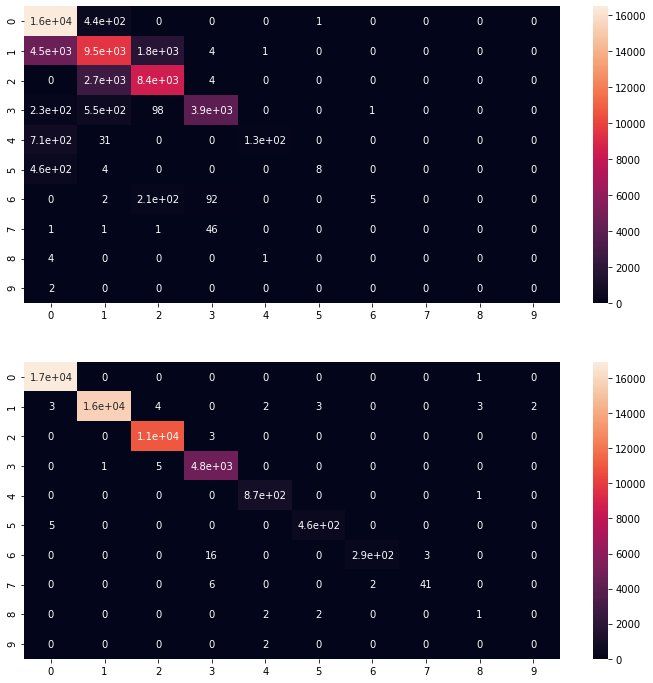

In [43]:
plt.figure(figsize=(12,12))

plt.subplot(211)

cf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cf_matrix_RF, annot=True)

plt.subplot(212)

cf_matrix_NN = confusion_matrix(y_test, y_pred_NN)
sns.heatmap(cf_matrix_NN, annot=True)

### Test Data

In [48]:
df_test = pd.read_csv('Test_data.csv')
df_test

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,2,2,3,12,3,8,1,12,3,9
1,1,9,4,5,2,6,4,11,4,8
2,1,1,4,12,1,12,3,3,3,1
3,4,3,4,6,2,6,4,8,1,9
4,4,9,4,10,4,8,4,2,4,5
...,...,...,...,...,...,...,...,...,...,...
55798,3,4,4,10,2,10,3,2,2,9
55799,1,5,3,9,1,6,3,3,4,7
55800,2,10,4,9,1,2,2,8,3,7
55801,4,13,4,11,2,10,1,13,4,8


In [49]:
df_test = df_test.astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55803 entries, 0 to 55802
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   S1      55803 non-null  category
 1   C1      55803 non-null  category
 2   S2      55803 non-null  category
 3   C2      55803 non-null  category
 4   S3      55803 non-null  category
 5   C3      55803 non-null  category
 6   S4      55803 non-null  category
 7   C4      55803 non-null  category
 8   S5      55803 non-null  category
 9   C5      55803 non-null  category
dtypes: category(10)
memory usage: 549.6 KB


In [50]:
x_testdata_enc = enc.fit_transform(df_test).toarray()
x_testdata_enc = pd.DataFrame(x_testdata_enc)
x_testdata_enc

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55798,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55799,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_testdata_pred_NN = NN.predict(x_testdata_enc)

res = pd.DataFrame(y_testdata_pred_NN) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = x_testdata_enc.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_NN.csv", index = False)